# Feature determination with unsupervised learning scoring

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### the input with body dataset has been prepared from a part of the 262Go dataset by a piece of java code to exctract the mail characteristics and return a csv file to be exploited here

In [107]:
df = pd.read_csv("input_with_body.csv")
df.head()
print(df.shape)

(5004, 9)


In [108]:
df.keys()

Index(['id', 'from', 'to', 'cc', 'subject', 'body', 'date', 'reply',
       'references'],
      dtype='object')

In [109]:
#the percentage of null value per column
round(df.isnull().sum()*100/df.shape[0],2).sort_values(ascending=False).head(20)


references    100.00
reply          61.15
cc             56.12
body            9.97
subject         2.72
to              0.14
id              0.00
from            0.00
date            0.00
dtype: float64

# We create  numerical features from non numerical columns

### The number of special chars in the body

In [110]:
df["body_special_chars"] = ''

def body_special_chars(row):
    return sum((not c.isdigit() and not c.isalpha() and not c.isspace()) for c in str(row["body"]))

df["body_special_chars"] = df.apply(lambda row: body_special_chars(row), axis=1)


In [111]:
df["body_size"] = ''

def body_size(row):
    return len(str(row["body"]))

df["body_size"] = df.apply(lambda row: body_size(row), axis=1)

In [112]:
df["cc_count"] = ''
df.head()
def count_cc(row):
    if str(row["cc"]) == "nan":
        return 0
    else:
        return len(str(row["cc"]).split("|"))

df["cc_count"] = df.apply(lambda row: count_cc(row), axis=1)

In [113]:
df["from_count"] = ''

def count_from(row):
        return len(str(row["from"]).split("|"))

df["from_count"] = df.apply(lambda row: count_from(row), axis=1)

In [114]:
df["to_count"] = ''

def count_to(row):
        return len(str(row["to"]).split("|"))

df["to_count"] = df.apply(lambda row: count_to(row), axis=1)

In [115]:
df["numbers_in_subject"] = ''

def count_numbers(row):
    return sum(c.isdigit() for c in str(row["subject"]))

df["numbers_in_subject"] = df.apply(lambda row: count_numbers(row), axis=1)

In [116]:
df["subject_size"] = ''

def subject_size(row):
    return len(str(row["subject"]))

df["subject_size"] = df.apply(lambda row: subject_size(row), axis=1)


In [117]:
df["subject_special_chars"] = ''

def count_special_chars(row):
    return sum((not c.isdigit() and not c.isalpha() and not c.isspace()) for c in str(row["subject"]))

df["subject_special_chars"] = df.apply(lambda row: count_special_chars(row), axis=1)

df.head()

,id,from,to,cc,subject,body,date,reply,references,body_special_chars,body_size,cc_count,from_count,to_count,numbers_in_subject,subject_size,subject_special_chars
0,1,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование заявки на опл��ту ...,NaN,Fri| 1 Apr 2022 10:07:02 +0300,NaN,NaN,0,3,0,1,1,10,66,6
1,2,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Kulakov Dmitry <dk@sawatzky.ru>| Kalinovsky Ro...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru...,Отчет БЦ Павловский 01.04.2022 г.,Уважаемые коллеги добрый день!Название объекта...,Fri| 1 Apr 2022 06:52:22 +0000,NaN,NaN,75,933,2,1,2,8,34,3
2,3,Gorbey Viacheslav <v.gorbey@sawatzky.ru>,Roman Vinogradov VTV GROUP LLC <vinogradov@vtv...,vandakurova@vtv-group.ru <vandakurova@vtv-grou...,PV изменение объема услуг,Роман добрый день!В связи с изменением конъюнк...,Thu| 31 Mar 2022 12:11:02 +0000,NaN,NaN,36,548,3,1,1,0,25,0
3,4,<docs@sawatzky.ru>,<a.anishchenko@sawatzky.ru>,NaN,Требуется Ваше согласование электронной служеб...,NaN,Thu| 24 Mar 2022 14:15:12 +0300,NaN,NaN,0,3,0,1,1,9,86,5
4,5,corp.autoreply@ntvplus.com <corp.autoreply@ntv...,Anishenko Aleksandr <a.anishchenko@sawatzky.ru>,NaN,Автоматический ответ: обновление модулей НТВ-ПЛЮС,Уважаемый абонент!Благодарим Вас за обращение ...,Fri| 11 Feb 2022 09:52:00 +0000,<FCF221A88169C846A25ADF5C38FC168291DD1ECA@NTV-...,NaN,18,378,0,1,1,0,49,2


In [118]:
###we extract and normalize numerical features
numerical_features = df[["body_size","cc_count", "numbers_in_subject", "from_count","to_count","subject_size", "subject_special_chars", "body_special_chars"]]
numerical_features.head()

,body_size,cc_count,numbers_in_subject,from_count,to_count,subject_size,subject_special_chars,body_special_chars
0,3,0,10,1,1,66,6,0
1,933,2,8,1,2,34,3,75
2,548,3,0,1,1,25,0,36
3,3,0,9,1,1,86,5,0
4,378,0,0,1,1,49,2,18


### We normalize the data to fit a Kmeans model

In [119]:
numerical_features = (numerical_features - numerical_features.mean()) / (numerical_features.max() - numerical_features.min())
numerical_features.head()

,body_size,cc_count,numbers_in_subject,from_count,to_count,subject_size,subject_special_chars,body_special_chars
0,-0.034547,-0.016207,0.237772,-0.001599,-0.002220,0.168855,0.318284,-0.031721
1,-0.022073,0.005771,0.175272,-0.001599,-0.001324,-0.009916,0.087515,-0.022733
2,-0.027237,0.016760,-0.074728,-0.001599,-0.002220,-0.060195,-0.143255,-0.027407
3,-0.034547,-0.016207,0.206522,-0.001599,-0.002220,0.280587,0.241361,-0.031721
4,-0.029517,-0.016207,-0.074728,-0.001599,-0.002220,0.073883,0.010592,-0.029564


### We use a kmeans model to clusterize our mails, trying from 2 to 5 clusters

In [120]:
from sklearn.cluster import KMeans
from sklearn import metrics

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    silhouette = metrics.silhouette_score(dataset, labels, metric='euclidean')
    return silhouette

for i in range(2, 5):
    silhouette = clustering_algorithm(i, numerical_features)
    print(i, silhouette)

#The best score is obtained for 2 clusters

2 0.5403374190422666
3 0.38260960549162476
4 0.42529670345944115


In [121]:
#The best result is obtained for 2 clusters we use the silhouette metric to measure it
#We can evaluate our model by evaluating it versus random data

random_data = np.random.rand(167,9)
silhouette_random = clustering_algorithm(2, random_data)
silhouette = clustering_algorithm(2, numerical_features)

print(silhouette_random)
print(silhouette)

0.09780890782852719
0.5403374190422666


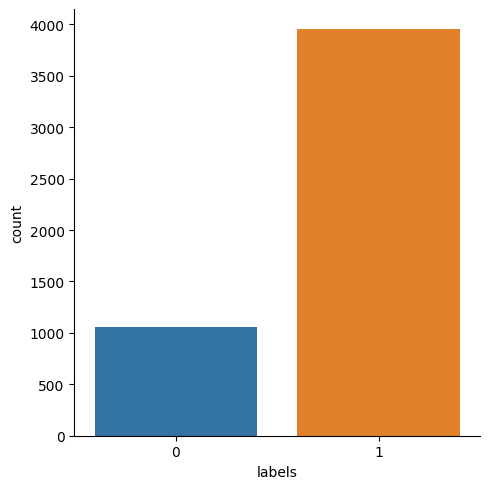

In [122]:
import seaborn as sns
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(numerical_features)
labels = kmeans.labels_

df['labels'] = labels
sns.catplot(x='labels', kind='count', data=df)


In [123]:
centroids = kmeans.cluster_centers_
for i in range(len(centroids[0])):
    print(numerical_features.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

body_size 
0.0000
cc_count 
0.0000
numbers_in_subject 
0.0153
from_count 
0.0000
to_count 
0.0000
subject_size 
0.0153
subject_special_chars 
0.0281
body_special_chars 
0.0001


#### the most used features seems to be the number of special characters and the number of numerical characters in the subject

In [124]:
df_0 = df[df['labels'] == 0]
df_1 = df[df['labels'] == 1]

# We visualize how well the model separates the data in 2 clusters

<function matplotlib.pyplot.show(close=None, block=None)>

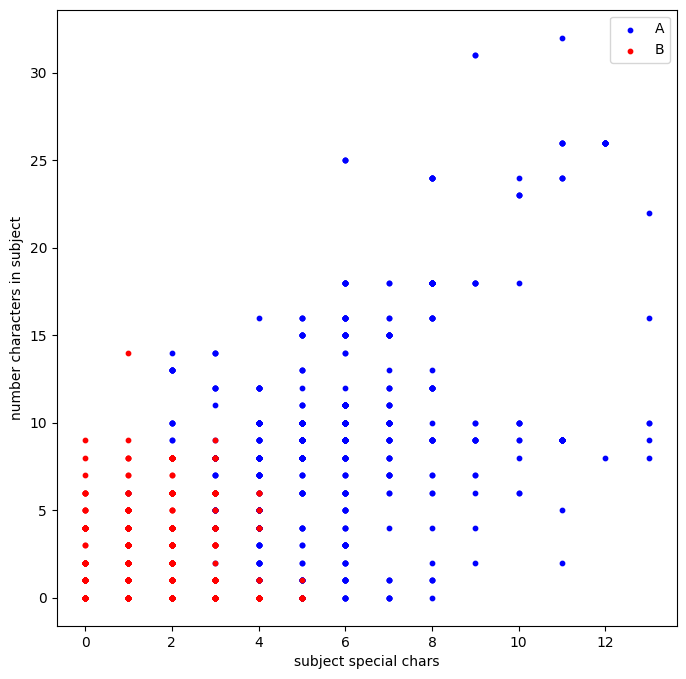

In [125]:
plt.figure(figsize=(8, 8))
plt.scatter(df_0['subject_special_chars'], df_0['numbers_in_subject'], c='blue', s=10, label='A')
plt.scatter(df_1['subject_special_chars'], df_1['numbers_in_subject'], c='red', s=10, label='B')
plt.xlabel('subject special chars')
plt.ylabel('number characters in subject')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

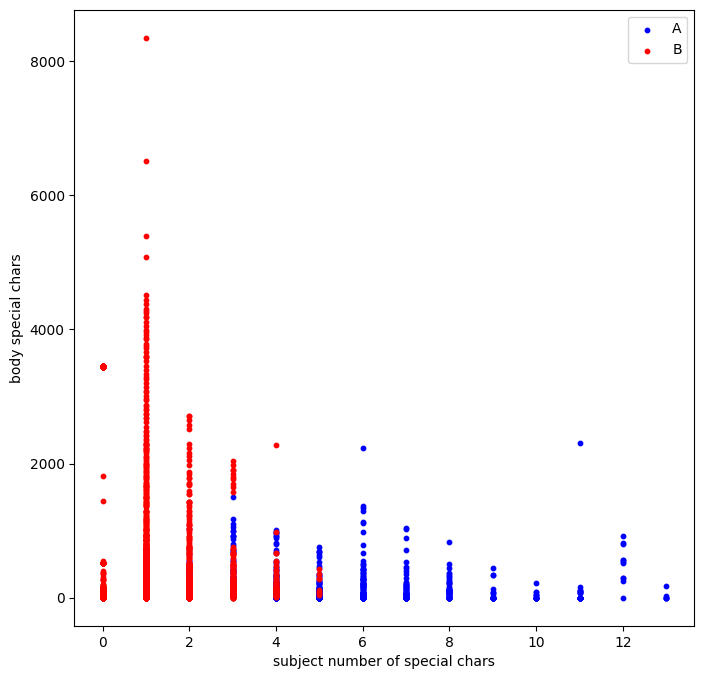

In [126]:
plt.figure(figsize=(8, 8))
plt.scatter(df_0['subject_special_chars'], df_0['body_special_chars'], c='blue', s=10, label='A')
plt.scatter(df_1['subject_special_chars'], df_1['body_special_chars'], c='red', s=10, label='B')
plt.xlabel('subject number of special chars')
plt.ylabel('body special chars')
plt.legend()
plt.show

## Conclusion

In this notebook we exploited the csv file of a dataset of mail, we manufactured some numerical features that we judged useful
and tried to separate the data with a kmeans clustering model. The separation seams to work and we identified some features that separates
the dataset better.
In the next notebook we will validate our hypothesis that this features can identify  phishing email with classic supervised learning algorithms